In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm # グラデーション用
import os

%matplotlib inline

In [ ]:
# data molding

# Get path
cwd = os.getcwd()
dir_path = os.path.join(cwd, 'result')

# get files
mua_str_list = ['0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85','0.90', '0.95']
mub_str_list = ['0.010', '0.015', '0.020', '0.025', '0.030', '0.035', '0.040', '0.045', '0.050', '0.055', '0.060', '0.065', '0.070', '0.075', '0.080', '0.085','0.090', '0.095']
data_list = []
for i in range(len(mua_str_list)):
    data = pd.read_csv(os.path.join(dir_path, 'mua='+mua_str_list[i]+'.csv'))
    data_list.append(data)

# Collect ts rows
ts_list = []
for i in range(len(data_list)):
    ts = list(data_list[i]['ts'])
    ts_list.append(ts)

# Vertical axis is mua, horizontal axis is mub
ts_df = pd.DataFrame(
    ts_list,
    columns=mub_str_list,
    index=mua_str_list
)

# Swap vertical and horizontal axes
ts_df_2 = ts_df.T

# Replacing the order of the vertical axis
ts_df_2 = ts_df_2.reindex(index=list(reversed(mub_str_list)))

<AxesSubplot:>

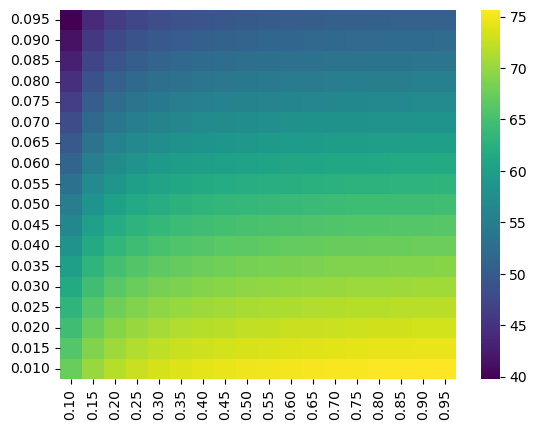

In [9]:
# data
sns.heatmap(ts_df_2, cmap='viridis')

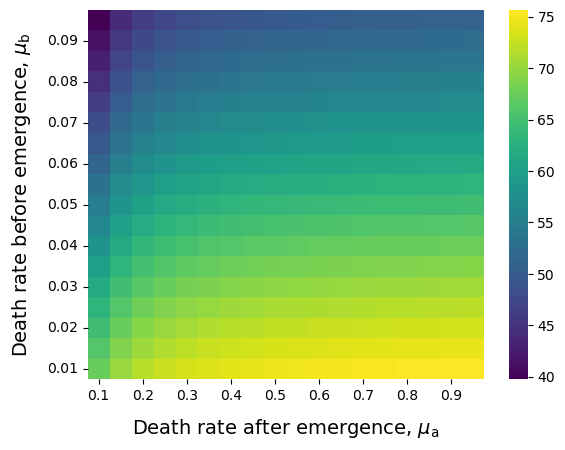

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating Heatmaps
ax = sns.heatmap(ts_df_2, cmap='viridis')

x_labels = [0.5, 2.5, 4.5, 6.5, 8.5, 10.5, 12.5, 14.5, 16.5]
x_labels_names = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

y_labels = [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]
y_labels_names = ['0.09', '0.08', '0.07', '0.06', '0.05', '0.04', '0.03', '0.02', '0.01']

plt.xticks(ticks=x_labels, labels=x_labels_names, rotation=0)


plt.yticks(ticks=y_labels, labels=y_labels_names)

ax.set_xlabel("Death rate after emergence, $\mu_{\mathrm{a}}$", fontsize=14, labelpad=10)
ax.set_ylabel("Death rate before emergence, $\mu_{\mathrm{b}}$", fontsize=14, labelpad=10)

plt.show()

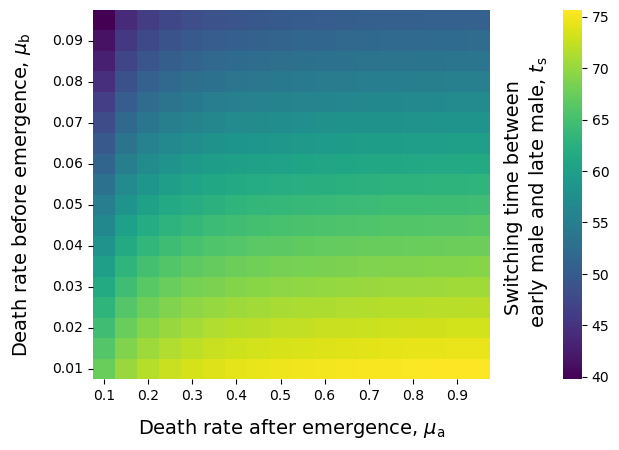

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ax = sns.heatmap(ts_df_2, cmap='viridis')

x_labels = [0.5, 2.5, 4.5, 6.5, 8.5, 10.5, 12.5, 14.5, 16.5]
x_labels_names = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

y_labels = [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]
y_labels_names = ['0.09', '0.08', '0.07', '0.06', '0.05', '0.04', '0.03', '0.02', '0.01']

plt.xticks(ticks=x_labels, labels=x_labels_names, rotation=0)

plt.yticks(ticks=y_labels, labels=y_labels_names)

ax.set_xlabel("Death rate after emergence, $\mu_{\mathrm{a}}$", fontsize=14, labelpad=10)
ax.set_ylabel("Death rate before emergence, $\mu_{\mathrm{b}}$", fontsize=14, labelpad=14)

cbar = ax.collections[0].colorbar
cbar.set_label("Switching time between \n early male and late male, $t_{\mathrm{s}}$", fontsize=14, labelpad=10)

cbar.ax.yaxis.set_ticks_position('right')

pos = cbar.ax.get_position()

new_pos = [pos.x0 + 0.076, pos.y0, pos.width, pos.height]
cbar.ax.set_position(new_pos)

cbar.ax.yaxis.set_label_position('left')

plt.savefig('heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()
